In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from statsmodels.sandbox.regression import predstd



In [2]:
df = pd.read_csv('Auto.csv')


In [3]:
df = df[df['horsepower'] != '?']
df['origin'] = df['origin'].astype('category')

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [4]:
# 10 (a)
result = sm.ols(formula="mpg ~ horsepower", data=train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     12.26
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           6.21e-53
Time:                        11:55:58   Log-Likelihood:                -848.60
No. Observations:                 325   AIC:                             1873.
Df Residuals:                     237   BIC:                             2206.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.7929      1.031     19.198      0.000      17.762      21.824
horsepower[T.105]     0.9571      1.597      0.599      0.550      -2.189       4.104
horsepower[T.107]     1.2071      3.993      0.302      0.763      -6.659       9.073
horsepower[T.108]    -0.7929      3.993     -0.199      0.843      -8.659       7.073
horsepower[T.110]     0.0405      1.375      0.029      0.977      -2.668       2.749
horsepower[T.112]    -0.1262      2.454     -0.051      0.959      -4.961       4.709
horsepower[T.113]     6.2071      3.993      1.555      0.121      -1.659      14.073
horsepower[T.115]     3.4571      2.916      1.186      0.237      -2.287       9.202
horsepower[T.116]     5.6071      3.993      1.404      0.162      -2.259      13.473
horsepower[T.120]    -1.2179      2.187     -0.557      0.578      -5.526       3.091
horsepower[T.122]     0.2071      3.993      0.052      0.959      -7.659       8.073
horsepower[T.125]    -0.0595      2.454     -0.024      0.981      -4.894       4.775
horsepower[T.129]    -4.4929      2.916     -1.541      0.125     -10.237       1.252
horsepower[T.130]    -4.5929      2.010     -2.285      0.023      -8.552      -0.634
horsepower[T.132]    12.9071      3.993      3.233      0.001       5.041      20.773
horsepower[T.133]    -3.5929      3.993     -0.900      0.369     -11.459       4.273
horsepower[T.135]    -1.5929      3.993     -0.399      0.690      -9.459       6.273
horsepower[T.137]    -5.7929      3.993     -1.451      0.148     -13.659       2.073
horsepower[T.138]    -3.2929      3.993     -0.825      0.410     -11.159       4.573
horsepower[T.139]     0.4071      3.993      0.102      0.919      -7.459       8.273
horsepower[T.140]    -3.4500      1.786     -1.932      0.055      -6.968       0.068
horsepower[T.142]    -4.2929      3.993     -1.075      0.283     -12.159       3.573
horsepower[T.145]    -4.3357      1.786     -2.428      0.016      -7.854      -0.818
horsepower[T.148]    -5.7929      3.993     -1.451      0.148     -13.659       2.073
horsepower[T.149]    -3.7929      3.993     -0.950      0.343     -11.659       4.073
horsepower[T.150]    -4.9679      1.344     -3.696      0.000      -7.616      -2.320
horsepower[T.153]    -5.7929      2.916     -1.987      0.048     -11.537      -0.048
horsepower[T.155]    -4.8429      2.916     -1.661      0.098     -10.587       0.902
horsepower[T.158]    -6.7929      3.993     -1.701      0.090     -14.659       1.073
horsepower[T.160]    -7.7929      3.993     -1.952      0.052     -15.659       0.073
horsepower[T.165]    -4.8679      2.187     -2.226      0.027      -9.176      -0.559
horsepower[T.167]    -7.7929      3.993     -1.952      0.052     -15.659       0.073
horsepower[T.170]    -4.9179      2.187     -2.249      0.025      -9.226

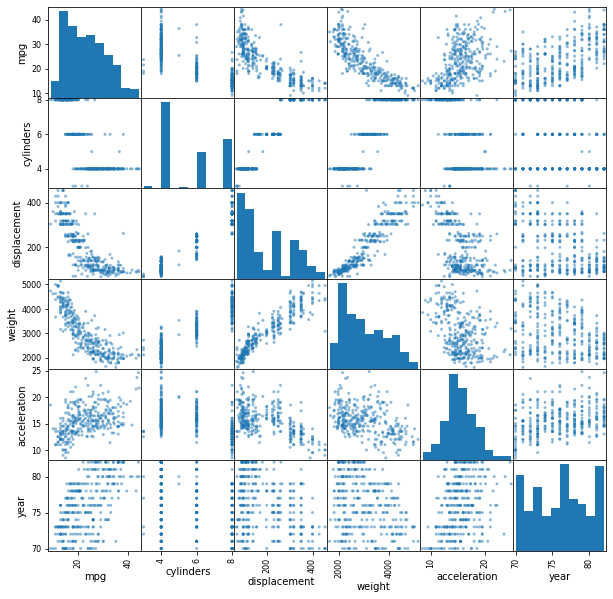

In [5]:
# 10 (b)
m = pd.plotting.scatter_matrix(train, figsize=(10, 10))

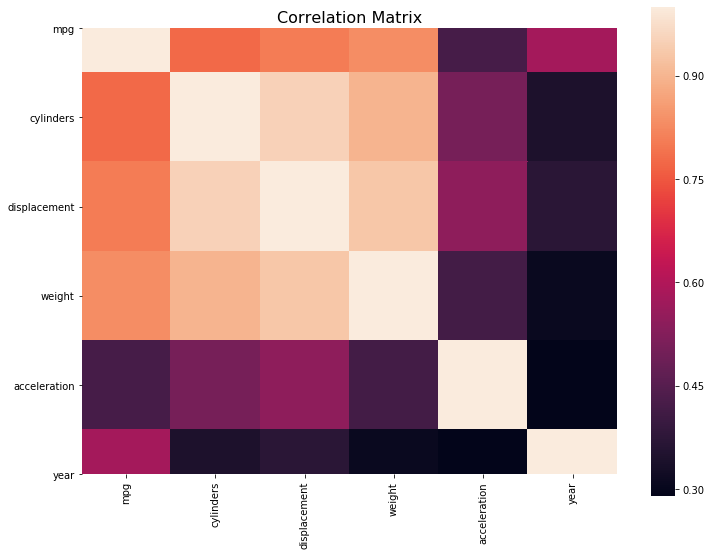

In [6]:
corr_mtrx = df.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mtrx, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);
plt.title('Correlation Matrix', fontsize=16);


In [7]:
# 10 (c)

model = sm.ols(formula='mpg ~ ' + '+'.join(df.columns.difference(['name', 'mpg'])), data=train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     26.04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.98e-84
Time:                        11:56:00   Log-Likelihood:                -726.78
No. Observations:                 325   AIC:                             1644.
Df Residuals:                     230   BIC:                             2003.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.6038      4.675     -4.408      0.000     -29.814     -11.393
horsepower[T.105]     1.0416      1.125      0.926      0.355      -1.174       3.257
horsepower[T.107]     0.7277      2.879      0.253      0.801      -4.944       6.400
horsepower[T.108]    -4.1722      2.891     -1.443      0.150      -9.868       1.524
horsepower[T.110]    -0.6220      0.984     -0.632      0.528      -2.560       1.317
horsepower[T.112]    -2.5703      1.767     -1.454      0.147      -6.052       0.912
horsepower[T.113]     4.3780      2.870      1.526      0.128      -1.276      10.032
horsepower[T.115]     0.5246      2.069      0.254      0.800      -3.553       4.602
horsepower[T.116]    -2.2039      2.916     -0.756      0.451      -7.950       3.542
horsepower[T.120]    -2.7253      1.636     -1.666      0.097      -5.949       0.499
horsepower[T.122]    -1.8920      2.899     -0.653      0.515      -7.604       3.820
horsepower[T.125]    -1.8328      1.839     -0.997      0.320      -5.456       1.791
horsepower[T.129]    -5.5274      2.180     -2.536      0.012      -9.822      -1.233
horsepower[T.130]    -1.9376      1.597     -1.213      0.226      -5.085       1.210
horsepower[T.132]     5.6071      2.931      1.913      0.057      -0.168      11.382
horsepower[T.133]    -6.1253      2.933     -2.088      0.038     -11.905      -0.345
horsepower[T.135]    -2.2482      2.876     -0.782      0.435      -7.915       3.419
horsepower[T.137]    -1.3062      2.903     -0.450      0.653      -7.025       4.413
horsepower[T.138]    -4.2047      2.929     -1.436      0.152      -9.975       1.566
horsepower[T.139]    -0.8585      2.900     -0.296      0.767      -6.573       4.856
horsepower[T.140]    -0.1540      1.513     -0.102      0.919      -3.136       2.828
horsepower[T.142]    -4.6004      2.914     -1.579      0.116     -10.341       1.141
horsepower[T.145]    -2.4508      1.512     -1.621      0.106      -5.429       0.528
horsepower[T.148]    -1.0851      3.000     -0.362      0.718      -6.996       4.826
horsepower[T.149]    -1.5471      2.926     -0.529      0.598      -7.313       4.219
horsepower[T.150]    -1.1983      1.298     -0.923      0.357      -3.756       1.359
horsepower[T.153]    -0.5796      2.236     -0.259      0.796      -4.984       3.825
horsepower[T.155]    -1.2026      2.245     -0.536      0.593      -5.626       3.220
horsepower[T.158]    -1.8678      2.967     -0.629      0.530      -7.714       3.979
horsepower[T.160]    -1.6799      2.971     -0.565      0.572      -7.534       4.175
horsepower[T.165]    -1.4451      1.740     -0.830      0.407      -4.874       1.983
horsepower[T.167]    -1.3769      3.116     -0.442      0.659      -7.517       4.763
horsepower[T.170]    -1.4467      1.906     -0.759      0.449      -5.203

In [8]:
# alternative 1: mpg from horsepower
model = sm.ols(formula='mpg ~ horsepower', data=train)
result_1 = model.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     12.26
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           6.21e-53
Time:                        11:56:00   Log-Likelihood:                -848.60
No. Observations:                 325   AIC:                             1873.
Df Residuals:                     237   BIC:                             2206.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.7929      1.031     19.198      0.000      17.762      21.824
horsepower[T.105]     0.9571      1.597      0.599      0.550      -2.189       4.104
horsepower[T.107]     1.2071      3.993      0.302      0.763      -6.659       9.073
horsepower[T.108]    -0.7929      3.993     -0.199      0.843      -8.659       7.073
horsepower[T.110]     0.0405      1.375      0.029      0.977      -2.668       2.749
horsepower[T.112]    -0.1262      2.454     -0.051      0.959      -4.961       4.709
horsepower[T.113]     6.2071      3.993      1.555      0.121      -1.659      14.073
horsepower[T.115]     3.4571      2.916      1.186      0.237      -2.287       9.202
horsepower[T.116]     5.6071      3.993      1.404      0.162      -2.259      13.473
horsepower[T.120]    -1.2179      2.187     -0.557      0.578      -5.526       3.091
horsepower[T.122]     0.2071      3.993      0.052      0.959      -7.659       8.073
horsepower[T.125]    -0.0595      2.454     -0.024      0.981      -4.894       4.775
horsepower[T.129]    -4.4929      2.916     -1.541      0.125     -10.237       1.252
horsepower[T.130]    -4.5929      2.010     -2.285      0.023      -8.552      -0.634
horsepower[T.132]    12.9071      3.993      3.233      0.001       5.041      20.773
horsepower[T.133]    -3.5929      3.993     -0.900      0.369     -11.459       4.273
horsepower[T.135]    -1.5929      3.993     -0.399      0.690      -9.459       6.273
horsepower[T.137]    -5.7929      3.993     -1.451      0.148     -13.659       2.073
horsepower[T.138]    -3.2929      3.993     -0.825      0.410     -11.159       4.573
horsepower[T.139]     0.4071      3.993      0.102      0.919      -7.459       8.273
horsepower[T.140]    -3.4500      1.786     -1.932      0.055      -6.968       0.068
horsepower[T.142]    -4.2929      3.993     -1.075      0.283     -12.159       3.573
horsepower[T.145]    -4.3357      1.786     -2.428      0.016      -7.854      -0.818
horsepower[T.148]    -5.7929      3.993     -1.451      0.148     -13.659       2.073
horsepower[T.149]    -3.7929      3.993     -0.950      0.343     -11.659       4.073
horsepower[T.150]    -4.9679      1.344     -3.696      0.000      -7.616      -2.320
horsepower[T.153]    -5.7929      2.916     -1.987      0.048     -11.537      -0.048
horsepower[T.155]    -4.8429      2.916     -1.661      0.098     -10.587       0.902
horsepower[T.158]    -6.7929      3.993     -1.701      0.090     -14.659       1.073
horsepower[T.160]    -7.7929      3.993     -1.952      0.052     -15.659       0.073
horsepower[T.165]    -4.8679      2.187     -2.226      0.027      -9.176      -0.559
horsepower[T.167]    -7.7929      3.993     -1.952      0.052     -15.659       0.073
horsepower[T.170]    -4.9179      2.187     -2.249      0.025      -9.226

In [9]:
# alternative 2: mpg from horsepower and weight
model = sm.ols(formula='mpg ~ horsepower + weight', data=train)
result_2 = model.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     14.57
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           8.11e-60
Time:                        11:56:00   Log-Likelihood:                -823.18
No. Observations:                 325   AIC:                             1824.
Df Residuals:                     236   BIC:                             2161.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            31.7143      2.114     15.000      0.000      27.549      35.879
horsepower[T.105]     1.8421      1.487      1.239      0.217      -1.087       4.771
horsepower[T.107]    -1.2513      3.721     -0.336      0.737      -8.581       6.079
horsepower[T.108]    -1.4980      3.702     -0.405      0.686      -8.791       5.795
horsepower[T.110]     0.6934      1.278      0.543      0.588      -1.825       3.211
horsepower[T.112]    -1.0279      2.279     -0.451      0.652      -5.517       3.462
horsepower[T.113]     2.8376      3.739      0.759      0.449      -4.528      10.203
horsepower[T.115]     2.8591      2.704      1.057      0.291      -2.468       8.186
horsepower[T.116]     4.7871      3.703      1.293      0.197      -2.507      12.082
horsepower[T.120]     0.3757      2.042      0.184      0.854      -3.648       4.399
horsepower[T.122]    -0.9689      3.705     -0.262      0.794      -8.268       6.330
horsepower[T.125]     1.6023      2.290      0.700      0.485      -2.908       6.113
horsepower[T.129]    -3.2189      2.710     -1.188      0.236      -8.558       2.120
horsepower[T.130]    -1.5029      1.926     -0.780      0.436      -5.296       2.291
horsepower[T.132]    12.1254      3.702      3.275      0.001       4.831      19.419
horsepower[T.133]    -2.4606      3.705     -0.664      0.507      -9.759       4.838
horsepower[T.135]     1.1472      3.726      0.308      0.758      -6.193       8.487
horsepower[T.137]    -2.2412      3.743     -0.599      0.550      -9.615       5.132
horsepower[T.138]    -0.0743      3.735     -0.020      0.984      -7.433       7.284
horsepower[T.139]     2.1519      3.711      0.580      0.563      -5.158       9.462
horsepower[T.140]     0.2427      1.755      0.138      0.890      -3.215       3.700
horsepower[T.142]    -0.6953      3.744     -0.186      0.853      -8.071       6.680
horsepower[T.145]    -0.9394      1.740     -0.540      0.590      -4.367       2.488
horsepower[T.148]     0.1130      3.816      0.030      0.976      -7.406       7.632
horsepower[T.149]     0.8804      3.773      0.233      0.816      -6.554       8.314
horsepower[T.150]    -1.3948      1.368     -1.020      0.309      -4.090       1.300
horsepower[T.153]    -1.8603      2.773     -0.671      0.503      -7.323       3.603
horsepower[T.155]     0.1979      2.818      0.070      0.944      -5.353       5.749
horsepower[T.158]    -2.0124      3.777     -0.533      0.595      -9.453       5.428
horsepower[T.160]    -2.6564      3.789     -0.701      0.484     -10.120       4.807
horsepower[T.165]    -1.8397      2.083     -0.883      0.378      -5.943       2.263
horsepower[T.167]    -0.9338      3.856     -0.242      0.809      -8.531       6.663
horsepower[T.170]    -0.5221      2.143     -0.244      0.808      -4.744

In [10]:
# alternative 3: mpg from horsepower and weight and log(weight)
model = sm.ols(formula='mpg ~ horsepower + weight + np.log(weight)', data=train)
result_3 = model.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     14.37
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           2.60e-59
Time:                        11:56:00   Log-Likelihood:                -822.92
No. Observations:                 325   AIC:                             1826.
Df Residuals:                     235   BIC:                             2166.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            71.7737     64.412      1.114      0.266     -55.125     198.673
horsepower[T.105]     1.8380      1.489      1.235      0.218      -1.095       4.771
horsepower[T.107]    -1.3364      3.728     -0.358      0.720      -8.681       6.008
horsepower[T.108]    -1.4593      3.707     -0.394      0.694      -8.763       5.845
horsepower[T.110]     0.6780      1.280      0.530      0.597      -1.844       3.200
horsepower[T.112]    -0.9958      2.282     -0.436      0.663      -5.492       3.501
horsepower[T.113]     2.6145      3.761      0.695      0.488      -4.794      10.023
horsepower[T.115]     2.8735      2.708      1.061      0.290      -2.461       8.208
horsepower[T.116]     4.8225      3.708      1.301      0.195      -2.482      12.127
horsepower[T.120]     0.3307      2.046      0.162      0.872      -3.701       4.362
horsepower[T.122]    -0.9477      3.710     -0.255      0.799      -8.257       6.361
horsepower[T.125]     1.5690      2.293      0.684      0.495      -2.949       6.087
horsepower[T.129]    -3.2264      2.713     -1.189      0.236      -8.572       2.119
horsepower[T.130]    -1.6454      1.942     -0.847      0.398      -5.471       2.180
horsepower[T.132]    12.1620      3.708      3.280      0.001       4.857      19.467
horsepower[T.133]    -2.4427      3.710     -0.658      0.511      -9.751       4.866
horsepower[T.135]     1.0523      3.734      0.282      0.778      -6.303       8.408
horsepower[T.137]    -2.4202      3.759     -0.644      0.520      -9.825       4.985
horsepower[T.138]    -0.2168      3.747     -0.058      0.954      -7.599       7.165
horsepower[T.139]     2.1360      3.716      0.575      0.566      -5.184       9.456
horsepower[T.140]     0.0249      1.792      0.014      0.989      -3.505       3.555
horsepower[T.142]    -0.8795      3.760     -0.234      0.815      -8.288       6.529
horsepower[T.145]    -1.1161      1.765     -0.632      0.528      -4.594       2.361
horsepower[T.148]    -0.3934      3.907     -0.101      0.920      -8.091       7.304
horsepower[T.149]     0.5597      3.813      0.147      0.883      -6.953       8.072
horsepower[T.150]    -1.6076      1.412     -1.139      0.256      -4.389       1.174
horsepower[T.153]    -2.0843      2.800     -0.744      0.457      -7.600       3.432
horsepower[T.155]    -0.1758      2.884     -0.061      0.951      -5.859       5.507
horsepower[T.158]    -2.3481      3.820     -0.615      0.539      -9.874       5.178
horsepower[T.160]    -3.0434      3.844     -0.792      0.429     -10.617       4.530
horsepower[T.165]    -1.9856      2.098     -0.946      0.345      -6.120       2.149
horsepower[T.167]    -1.6027      4.008     -0.400      0.690      -9.499       6.294
horsepower[T.170]    -0.8389      2.205     -0.380      0.704      -5.183

In [19]:
result_1.mse_model, result_2.mse_model, result_3.mse_model

(182.48364334267265, 186.2122619708589, 184.1757343408415)

In [ ]:
# TODO: Calculate MSE on tested set!

In [18]:
# 
# TODO: Get zscores and filter out outlie
# df.apply(scipy.stats.zscore)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(scipy.stats.zscore)

# 11

train_copy = train.copy()
train_copy[(np.abs(scipy.stats.zscore(train_copy)) < 3).all(axis=1)]
model = sm.ols(formula='mpg ~ ' + '+'.join(df.columns.difference(['name', 'mpg'])), data=train)
result = model.fit()
result.summary()

TypeError: unsupported operand type(s) for /: 'str' and 'int'